<span style="font-family:Arial; font-size:2.5em;">Chair Image Generator (GANs)</span>
---
![](https://espresso-jobs.com/conseils-carriere/wp-content/uploads/2019/05/monalisa.gif)
<br>

# Introduction

- Generative Adversarial Networks (GANs)
- How GANs Work
- GANs Process
- Examples

### Generative Adversarial Networks (GANs)

Generative Adversarial Networks are used to generate images that never existed before. They learn about the world (objects, animals and so forth) and create new versions of those images that never existed.

They have two components:

- A **Generator** - this creates the images.
- A **Discriminator** - this assesses the images and tells the generator if they are similar to what it has been trained on. These are based off real world examples.

When training the network, both the generator and discriminator start from scratch and learn together.

### How GANs Work


**G** for **Generative** - this is a model that takes an input as a random noise singal and then outputs an image.

![](https://camo.githubusercontent.com/a2c5a0db812c0ade199e5ccacf86c6cff4db1685/68747470733a2f2f61636975732e636f2e756b2f77702d636f6e74656e742f7468656d65732f61636975732f6d616368696e655f6c6561726e696e672f696d67732f63762f67656e657261746976652e706e67)

**A** for **Adversarial** - this is the discriminator, the opponent of the generator. This is capable of learning about objects, animals or other features specified. For example: if you supply it with pictures of dogs and non-dogs, it would be able to identify the difference between the two.

![](https://camo.githubusercontent.com/96c8ccb9a91b8789106c1b3dfc9d62dde9d3cbe1/68747470733a2f2f61636975732e636f2e756b2f77702d636f6e74656e742f7468656d65732f61636975732f6d616368696e655f6c6561726e696e672f696d67732f63762f6469736372696d696e61746f722d6578616d706c652e706e67)

Using this example, once the discriminator has been trained, showing the discriminator a picture that isn't a dog it will return a 0. Whereas, if you show it a dog it will return a 1.

![](https://camo.githubusercontent.com/8b5978b05b5ab4cd9bfba4819a0f0e09a12c8068/68747470733a2f2f61636975732e636f2e756b2f77702d636f6e74656e742f7468656d65732f61636975732f6d616368696e655f6c6561726e696e672f696d67732f63762f6469736372696d696e61746f722d73636f7265732e706e67)

**N** for **Network** - meaning the generator and discriminator are both neural networks.


### GANs Process

**Step 1** - we input a random noise signal into the generator. The generator creates some images which is used for training the discriminator. We provide the discriminator with some features/images we want it to learn and the discriminator outputs probabilities. These probabilities can be rather high as the discriminator has only just started being trained. The values are then assessed and identified. The error is calculated and these are backpropagated through the discriminator, where the weights are updated.

![](https://camo.githubusercontent.com/a26a06e2437514df1bbd736480f06a86aabebef8/68747470733a2f2f61636975732e636f2e756b2f77702d636f6e74656e742f7468656d65732f61636975732f6d616368696e655f6c6561726e696e672f696d67732f63762f73746570312d6469736372696d696e61746f722e706e67)

Next we train the generator. We take the batch of images that it created and put them through the discriminator again. We do not include the feature images. The generator learns by tricking the discriminator into it outputting false positives.

The discriminator will provide an output of probabilities. The values are then assessed and compared to what they should have been. The error is calculated and backpropagated through the generator and the weights are updated.

![](https://camo.githubusercontent.com/07a68fab0dbea632b29d6186e298a6c05333497c/68747470733a2f2f61636975732e636f2e756b2f77702d636f6e74656e742f7468656d65732f61636975732f6d616368696e655f6c6561726e696e672f696d67732f63762f73746570312d67656e657261746f722e706e67)

**Step 2** - This is the same as step 1 but the generator and discriminator are trained a little more. Through backpropagation the generator understands its mistakes and starts to make them more like the feature.

This is created through a *Deconvolutional Neural Network*.

### Examples

**GANs** can be used for the following:

- Generating Images
- Image Modification
- Super Resolution
- Assisting Artists
- Photo-Realistic Images
- Speech Generation
- Face Ageing

<br>
**[It’s Training Cats and Dogs: NVIDIA Research Uses AI to Turn Cats Into Dogs, Lions and Tigers, Too](https://blogs.nvidia.com/blog/2018/04/15/nvidia-research-image-translation/)**


**Importamos las librerías**

In [ ]:
from __future__ import print_function
from time import time
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.datasets as dset
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torch import nn, optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torchvision.utils import save_image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tqdm.notebook import tqdm
import os
import itertools
from torch.autograd import Variable

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


**Importamos y transformamos las imágenes para trabajarlas**

In [1]:
!ls /kaggle/input

antic_chairs


In [2]:
FOLDER = '/kaggle/input/'
CLASS = 'antic-chairs/antic_chairs/'
PATH =  '/kaggle/input/antic_chairs/'
images = os.listdir(PATH)
print(f'There are {len(os.listdir(PATH))} chairs .')

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12,10))

for indx, axis in enumerate(axes.flatten()):
    rnd_indx = np.random.randint(0, len(os.listdir(PATH)))
    # https://matplotlib.org/users/image_tutorial.html
    img = plt.imread(PATH + images[rnd_indx])
    imgplot = axis.imshow(img)
    axis.set_title(images[rnd_indx])
    axis.set_axis_off()
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

print('Maximo: ', np.max(img), 'Minimo: ', np.min(img))

NameError: name 'os' is not defined

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

NameError: name 'torch' is not defined

In [4]:
batch_size = 32
image_size = 64
latent_dim = 100
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose([transforms.Resize(64),
                                transforms.CenterCrop(64),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

transform_noresize = transforms.Compose([transforms.Resize(64), transforms.ToTensor()])

train_data = datasets.ImageFolder(FOLDER, transform=transform)
train_loader = DataLoader(train_data, shuffle=True,
                                           batch_size=batch_size)

train_data_noresize = datasets.ImageFolder(FOLDER, transform=transform_noresize)
train_loader_noresize = DataLoader(train_data_noresize, shuffle=True,
                                           batch_size=batch_size)

NameError: name 'torch' is not defined

(32, 64, 64, 3)


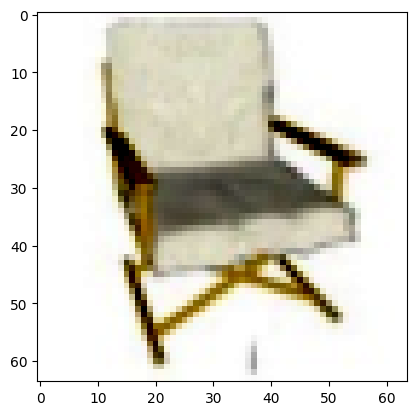

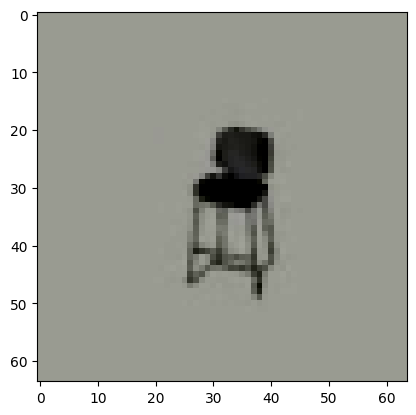

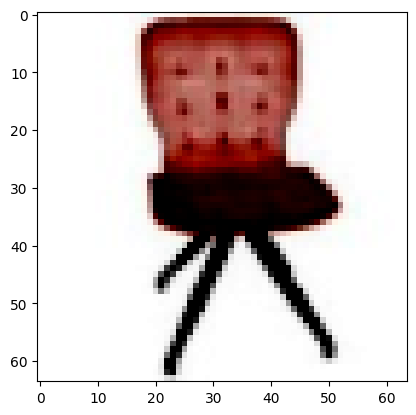

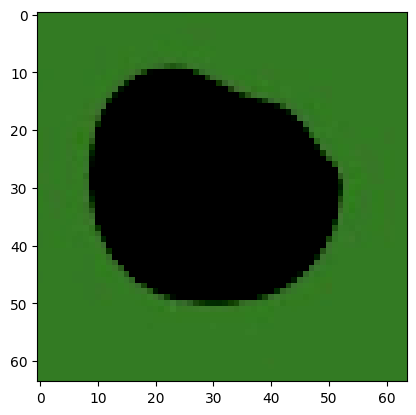

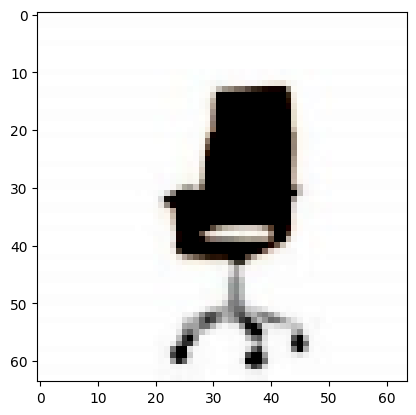

(32, 64, 64, 3)


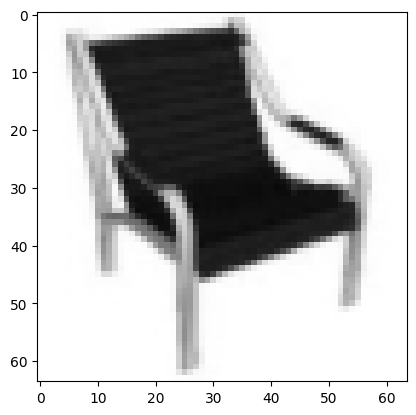

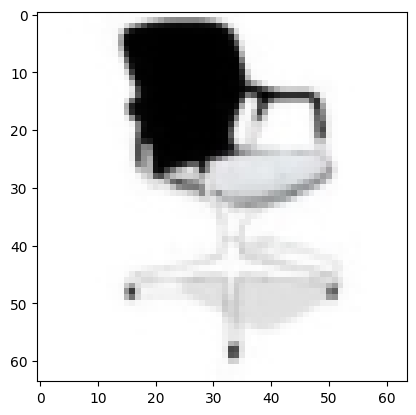

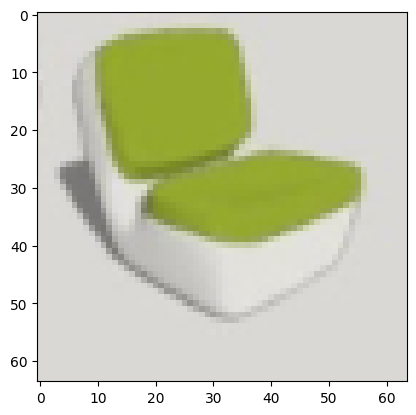

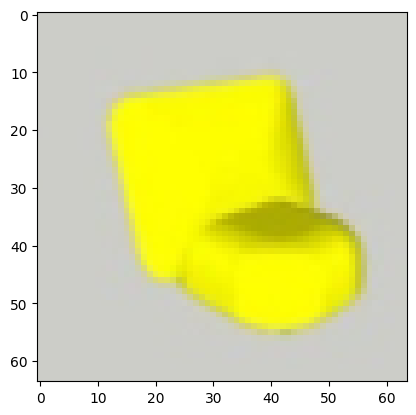

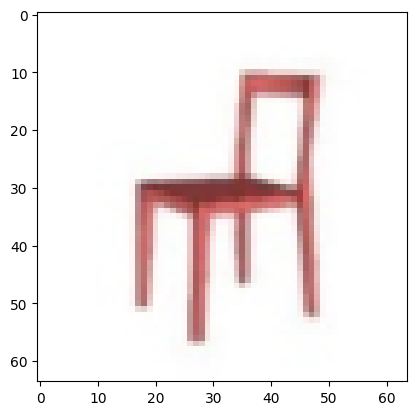

In [6]:
imgs, label = next(iter(train_loader))
imgs = imgs.numpy().transpose(0, 2, 3, 1)

imgs_noresize, label_noresize = next(iter(train_loader_noresize))
imgs_noresize = imgs_noresize.numpy().transpose(0, 2, 3, 1)

print(imgs.shape)
for i in range(5):
    plt.imshow(imgs[i])
    plt.show()

print(imgs_noresize.shape)
for i in range(5):
    plt.imshow(imgs_noresize[i])
    plt.show()

# Pesos
### Definimos la función weights_init 

In [7]:
def weights_init(m):
    """
    Takes as input a neural network m that will initialize all its weights.
    """
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        m.weight.data.normal_(0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        m.weight.data.normal_(1.0, 0.02)
        m.bias.data.fill_(0)

# Generador

In [8]:
class G(nn.Module):
    def __init__(self):
        # Used to inherit the torch.nn Module
        super(G, self).__init__()
        # Meta Module - consists of different layers of Modules
        self.main = nn.Sequential(
                nn.ConvTranspose2d(latent_dim, 512, 4, stride=2, padding=0, bias=False),
                nn.BatchNorm2d(512),
                nn.ReLU(True),
                nn.ConvTranspose2d(512, 256, 4, stride=2, padding=1, bias=False),
                nn.BatchNorm2d(256),
                nn.ReLU(True),
                nn.ConvTranspose2d(256, 128, 4, stride=2, padding=1, bias=False),
                nn.BatchNorm2d(128),
                nn.ReLU(True),
                nn.ConvTranspose2d(128, 64, 4, stride=2, padding=1, bias=False),
                nn.BatchNorm2d(64),
                nn.ReLU(True),
                nn.ConvTranspose2d(64, 3, 4, stride=2, padding=1, bias=False),
                nn.Sigmoid()
                )
        
    def forward(self, input):
        output = self.main(input)
        return output

# Creating the generator
netG = G().to(device)
netG.apply(weights_init)

G(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(2, 2), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Sigmoid()
  )
)

# Discriminador

In [9]:
# Defining the discriminator
class D(nn.Module):
    def __init__(self):
        super(D, self).__init__()
        self.main = nn.Sequential(
                nn.Conv2d(3, 64, 4, stride=1, padding=1, bias=False),
                nn.MaxPool2d(2,2),
                nn.LeakyReLU(negative_slope=0.2, inplace=True),
                nn.Dropout(0.3),
                nn.Conv2d(64, 128, 4, stride=1, padding=1, bias=False),
                nn.MaxPool2d(2,2),
                nn.BatchNorm2d(128),
                nn.LeakyReLU(negative_slope=0.2, inplace=True),
                nn.Dropout(0.3),
                nn.Conv2d(128, 256, 4, stride=1, padding=1, bias=False),
                nn.MaxPool2d(2,2),
                nn.BatchNorm2d(256),
                nn.LeakyReLU(negative_slope=0.2, inplace=True),
                nn.Dropout(0.3),
                nn.Conv2d(256, 512, 4, stride=1, padding=1, bias=False),
                nn.MaxPool2d(2,2),
                nn.BatchNorm2d(512),
                nn.LeakyReLU(negative_slope=0.2, inplace=True),
                nn.Dropout(0.3),
                nn.Flatten(),
                nn.Linear(4608,100),
                nn.LeakyReLU(negative_slope=0.2, inplace=True),
                nn.Linear(100,1),
                nn.Sigmoid()
                )
        
    def forward(self, input):
        output = self.main(input)
        # .view(-1) = Flattens the output into 1D instead of 2D
        return output.view(-1)
    
    
# Creating the discriminator
netD = D().to(device)
netD.apply(weights_init)


D(
  (main): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1), bias=False)
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): LeakyReLU(negative_slope=0.2, inplace=True)
    (3): Dropout(p=0.3, inplace=False)
    (4): Conv2d(64, 128, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1), bias=False)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Dropout(p=0.3, inplace=False)
    (9): Conv2d(128, 256, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1), bias=False)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): LeakyReLU(negative_slope=0.2, inplace=True)
    (13): Dropout(p=0.3, inplace=False)


# Entrenamiento

In [10]:
!mkdir results
!ls

results


In [11]:
LR = 0.005
# Otra posibilidad
LR_G = 0.005
LR_D = 0.005

criterion = nn.BCELoss()
optimizerD = optim.Adam(netD.parameters(), lr=LR_D, betas=(0.5, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=LR_G, betas=(0.5, 0.999))


In [12]:
# Datos reducidos a 64x64
# data_loader = train_loader
# Datos originales no normalizados
data_loader = train_loader_noresize

EPOCH = 4 # play with me

losses_D = []
losses_G = []

t0 = time()
for epoch in range(EPOCH):
    epoch_loss_D = 0
    epoch_loss_G = 0
    num_batches = 0
    for i, data in enumerate(data_loader, 0):
        # 1st Step: Updating the weights of the neural network of the discriminator
        netD.zero_grad()
        
        # Training the discriminator with a real image of the dataset
        input,_ = data
        input = input.to(device)
        target = torch.ones(input.size()[0]).to(device)
        output = netD(input)
        errD_real = criterion(output, target)
        
        # Training the discriminator with a fake image generated by the generator
        noise = torch.randn(input.size()[0], 100, 1, 1).to(device)
        fake = netG(noise)
        target = torch.zeros(input.size()[0]).to(device)
        output = netD(fake.detach())
        errD_fake = criterion(output, target)
        
        # Backpropagating the total error
        errD = errD_real + errD_fake
        errD.backward()
        optimizerD.step()
        
        # 2nd Step: Updating the weights of the neural network of the generator
        netG.zero_grad()
        target = torch.ones(input.size()[0]).to(device)
        output = netD(fake)
        errG = criterion(output, target)
        errG.backward()
        optimizerG.step()
        # Acumular pérdidas
        epoch_loss_D += errD.item()
        epoch_loss_G += errG.item()
        num_batches += 1
        
    losses_D.append(epoch_loss_D / num_batches)
    losses_G.append(epoch_loss_G / num_batches)
    
    # 3rd Step: Printing the losses and saving the real images and the generated images of the last minibatch 
    print('[%d/%d] Loss_D: %.4f; Loss_G: %.4f' % (epoch, EPOCH, errD.item(), errG.item()))
    save_image(input, '%s/real_samples.png' % "./results", normalize=True)
    save_image(fake.data, '%s/fake_samples_epoch_%03d.png' % ("./results", epoch), normalize=True)
tf = time()
print(tf - t0)

[0/4] Loss_D: 1.1389; Loss_G: 1.2574
[1/4] Loss_D: 1.1462; Loss_G: 1.2902
[2/4] Loss_D: 1.2535; Loss_G: 0.5845
[3/4] Loss_D: 1.5851; Loss_G: 0.7308
30.587132930755615


# Salvar pesos

In [13]:
# Salvar si nos ha gustado el resultado
best_model_g = '/kaggle/working/results/generator.pth'
best_model_d = '/kaggle/working/results/discriminator.pth'
torch.save(netG.state_dict(), best_model_g)
torch.save(netD.state_dict(), best_model_d)

# Recuperar pesos

In [16]:
# Recuperar
best_model_g = '/kaggle/working/results/generator.pth'
best_model_d = '/kaggle/working/results/discriminator.pth'
netG.load_state_dict(torch.load(best_model_g, weights_only=True))
netD.load_state_dict(torch.load(best_model_d, weights_only=True))

<All keys matched successfully>

# Gráfica de perdida

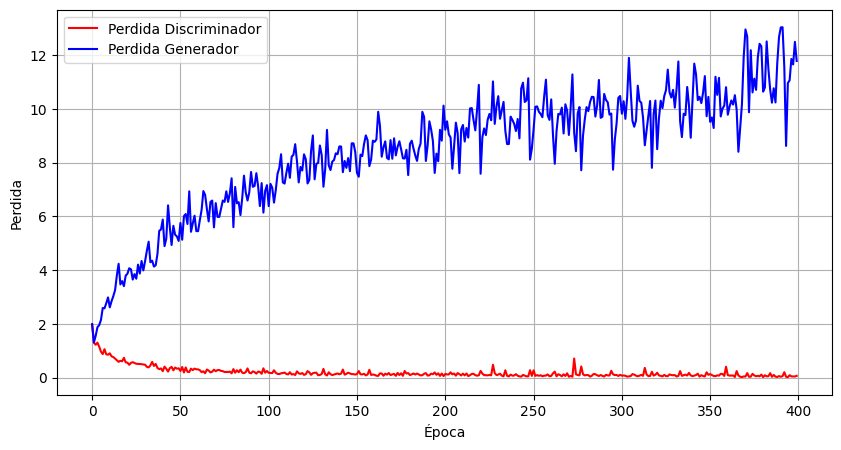

In [17]:

plt.figure(figsize=(10, 5))
plt.plot(range(EPOCH), losses_D, label='Perdida Discriminador', color='red')
plt.plot(range(EPOCH), losses_G, label='Perdida Generador', color='blue')
plt.xlabel('Época')
plt.ylabel('Perdida')
#plt.title('Perdida del Generador y Discriminador por Época')
plt.legend()
plt.grid(True)
plt.savefig('./results/loss_plot.png')  # Guarda la gráfica
plt.show()

In [17]:
if not os.path.exists('./test'):
    os.mkdir('./test')
    
im_batch_size = 50
n_images=10

for i_batch in tqdm(range(0, n_images, im_batch_size)):
    gen_z = torch.randn(im_batch_size, 100, 1, 1, device=device)
    gen_images = netG(gen_z)
    images = gen_images.to("cpu").clone().detach()
with torch.no_grad():
    outputs = netD(gen_images) 
    images = images.numpy().transpose(0, 2, 3, 1)
    for i_image in range(gen_images.size(0)):
        save_image(gen_images[i_image, :, :, :], os.path.join('./test', f'image_{i_batch+i_image:05d}.png'))
        

  0%|          | 0/1 [00:00<?, ?it/s]

In [25]:
import itertools

In [26]:
in_batch_size = batch_size

# Obtener un batch de imágenes reales del DataLoader
real_images_iter = iter(train_loader)
real_images, _ = next(real_images_iter)  # el dataloader devuelve (imagen, etiqueta)
real_images = real_images.to(device)

# Generar imágenes falsas con el generador
gen_z = torch.randn(in_batch_size, latent_dim, 1, 1, device=device)
fake_images = netG(gen_z).detach()

# Concatenar ambos tipos de imágenes
combined_images = torch.cat([real_images, fake_images], dim=0)

# Evaluar con el discriminador
with torch.no_grad():
    outputs = netD(combined_images)

# Separar los scores
real_scores = outputs[:in_batch_size]
fake_scores = outputs[in_batch_size:]

# Guardar imágenes y mostrar resultados
for i in range(in_batch_size):
    save_image(real_images[i], f'./test/real_image_{i:05d}.png')
    print(f'Imagen real {i:05d} - Discriminador: {real_scores[i].item():.4f}')

    save_image(fake_images[i], f'./test/fake_image_{i:05d}.png')
    print(f'Imagen fake {i:05d} - Discriminador: {fake_scores[i].item():.4f}')

Imagen real 00000 - Discriminador: 0.5366
Imagen fake 00000 - Discriminador: 0.6149
Imagen real 00001 - Discriminador: 0.7103
Imagen fake 00001 - Discriminador: 0.4659
Imagen real 00002 - Discriminador: 0.9236
Imagen fake 00002 - Discriminador: 0.6576
Imagen real 00003 - Discriminador: 0.8746
Imagen fake 00003 - Discriminador: 0.6868
Imagen real 00004 - Discriminador: 0.8065
Imagen fake 00004 - Discriminador: 0.6393
Imagen real 00005 - Discriminador: 0.4351
Imagen fake 00005 - Discriminador: 0.4137
Imagen real 00006 - Discriminador: 0.7981
Imagen fake 00006 - Discriminador: 0.6644
Imagen real 00007 - Discriminador: 0.6408
Imagen fake 00007 - Discriminador: 0.6908
Imagen real 00008 - Discriminador: 0.7685
Imagen fake 00008 - Discriminador: 0.5559
Imagen real 00009 - Discriminador: 0.6076
Imagen fake 00009 - Discriminador: 0.6621
Imagen real 00010 - Discriminador: 0.9118
Imagen fake 00010 - Discriminador: 0.4298
Imagen real 00011 - Discriminador: 0.8214
Imagen fake 00011 - Discriminador:

# Ejemplo Imágenes Sintéticas

In [ ]:
fig = plt.figure(figsize=(25, 16))
# display 10 images from each class
for i, j in enumerate(images[:32]):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    plt.imshow(j)